# Tarea 4 Ecuaciones algebraícas no lineales
**Alumno:** Mario Rodríguez Félix

**Profesora:** Dra. Briceyda B. Delgado López

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1

Los métodos de Bisección, Newton y Secante, son métodos numéricos para aproximar los valores de raíces de funciones del tipo 
$$ f(x) = 0 $$
Las similitudes enre ellos son las siguientes:
* Todos los métodos son iterativos
* Todos requieren de una función continua para funcionar
* En todos los métodos juega un papel importante la elección de los puntos iniciales así como las características de la función cuyas reíces se quieren aproximar.

Las diferencias entre estos métodos son:
* El método de bisección, requiere de la elección de un intervalo conformado por dos puntos que deben de cumplir la condición $ f(a)*f(b) < 0 $, por su lado secante también requiere de dos puntos pero no es necesario que cumplan la condición anterior, mientras que newton requiere de un solo valor inicial.
* El método de bisección búsca la raíz al dividir el intervalo a la mitad de manera iterativa hasta converger, newton hace uso de la derivada para acercarse a la raiz, y secante no requiere una derivada, sino que hace una aproximación de esta basada en diferencias finitas.
* Newton requiere de la elección de un punto inicial cercano a la raíz y que la función sea diferenciable en ese punto, secante no requiere está última condición pero es necesario elegir los puntos iniciales cercanos a la raíz, mientras que bisección, solo requiere de la elección adecuada del intervalo.
* Bisección es el más lento de los tres, pero también es el más robusto, ya que siempre encuentra la raíz que se encuentra dentro del intervalo establecido, newton es la más rápida pero requeire de las condiciones antes descritas y si el punto inicial no es adecuado, el médoto puede no converger, o converger en una raíz incorrecta. Por su parte, secante es más rápida que bisección y más lenta que newton, tiene la ventaja de no requerir derivadas pero también corre el riesgo de no converger si no se eligen de manera adecuada los puntos iniciales.


# Ejercicio 2

### a)

In [2]:
# Se define la función para la cual se encontrará la raíz
def f_ejercicio2(x):
    return x**3 - 6*(x**2) + 11*x - 6

# Se define la derivada de la función
def derivada_f_ejercicio2(x):
    return 3*(x**2) - (12*x) + 11

# Se crea la función que implementa el método de Newton
def newton(f, e, x0, derivada_f):
    counter = 0
    while np.absolute(f(x0)) > e:
        x1 = x0 - (f(x0)/derivada_f(x0))
        x0 = x1
        counter += 1

    return counter, x0

### b) y c) 

In [3]:
e = 10**(-6) # tolerancia
x0 = 1.5 # valor inicial

iteraciones, x_raiz = newton(f_ejercicio2, e, x0, derivada_f_ejercicio2)
print(f"El valor de x que hace que f(x) = 0 es: {x_raiz}")
print(f"Se necesitan {iteraciones} iteraciones para encontrar x_raiz")

El valor de x que hace que f(x) = 0 es: 3.0
Se necesitan 1 iteraciones para encontrar x_raiz


In [4]:
# Función lineal que se obtiene a partir de la expansión de 
# la serie de Taylor en el punto x = x0
def f_lineal(x, f, x0, df):
    return f(x0) + ((x-x0)*(df(x0)))

In [5]:
# Valores de x y y que representan la aproximación lineal al valor x1
x_lineal = np.linspace(0, 3.5)
y_lineal = f_lineal(x_lineal, f_ejercicio2, 1.5, derivada_f_ejercicio2)

### d)

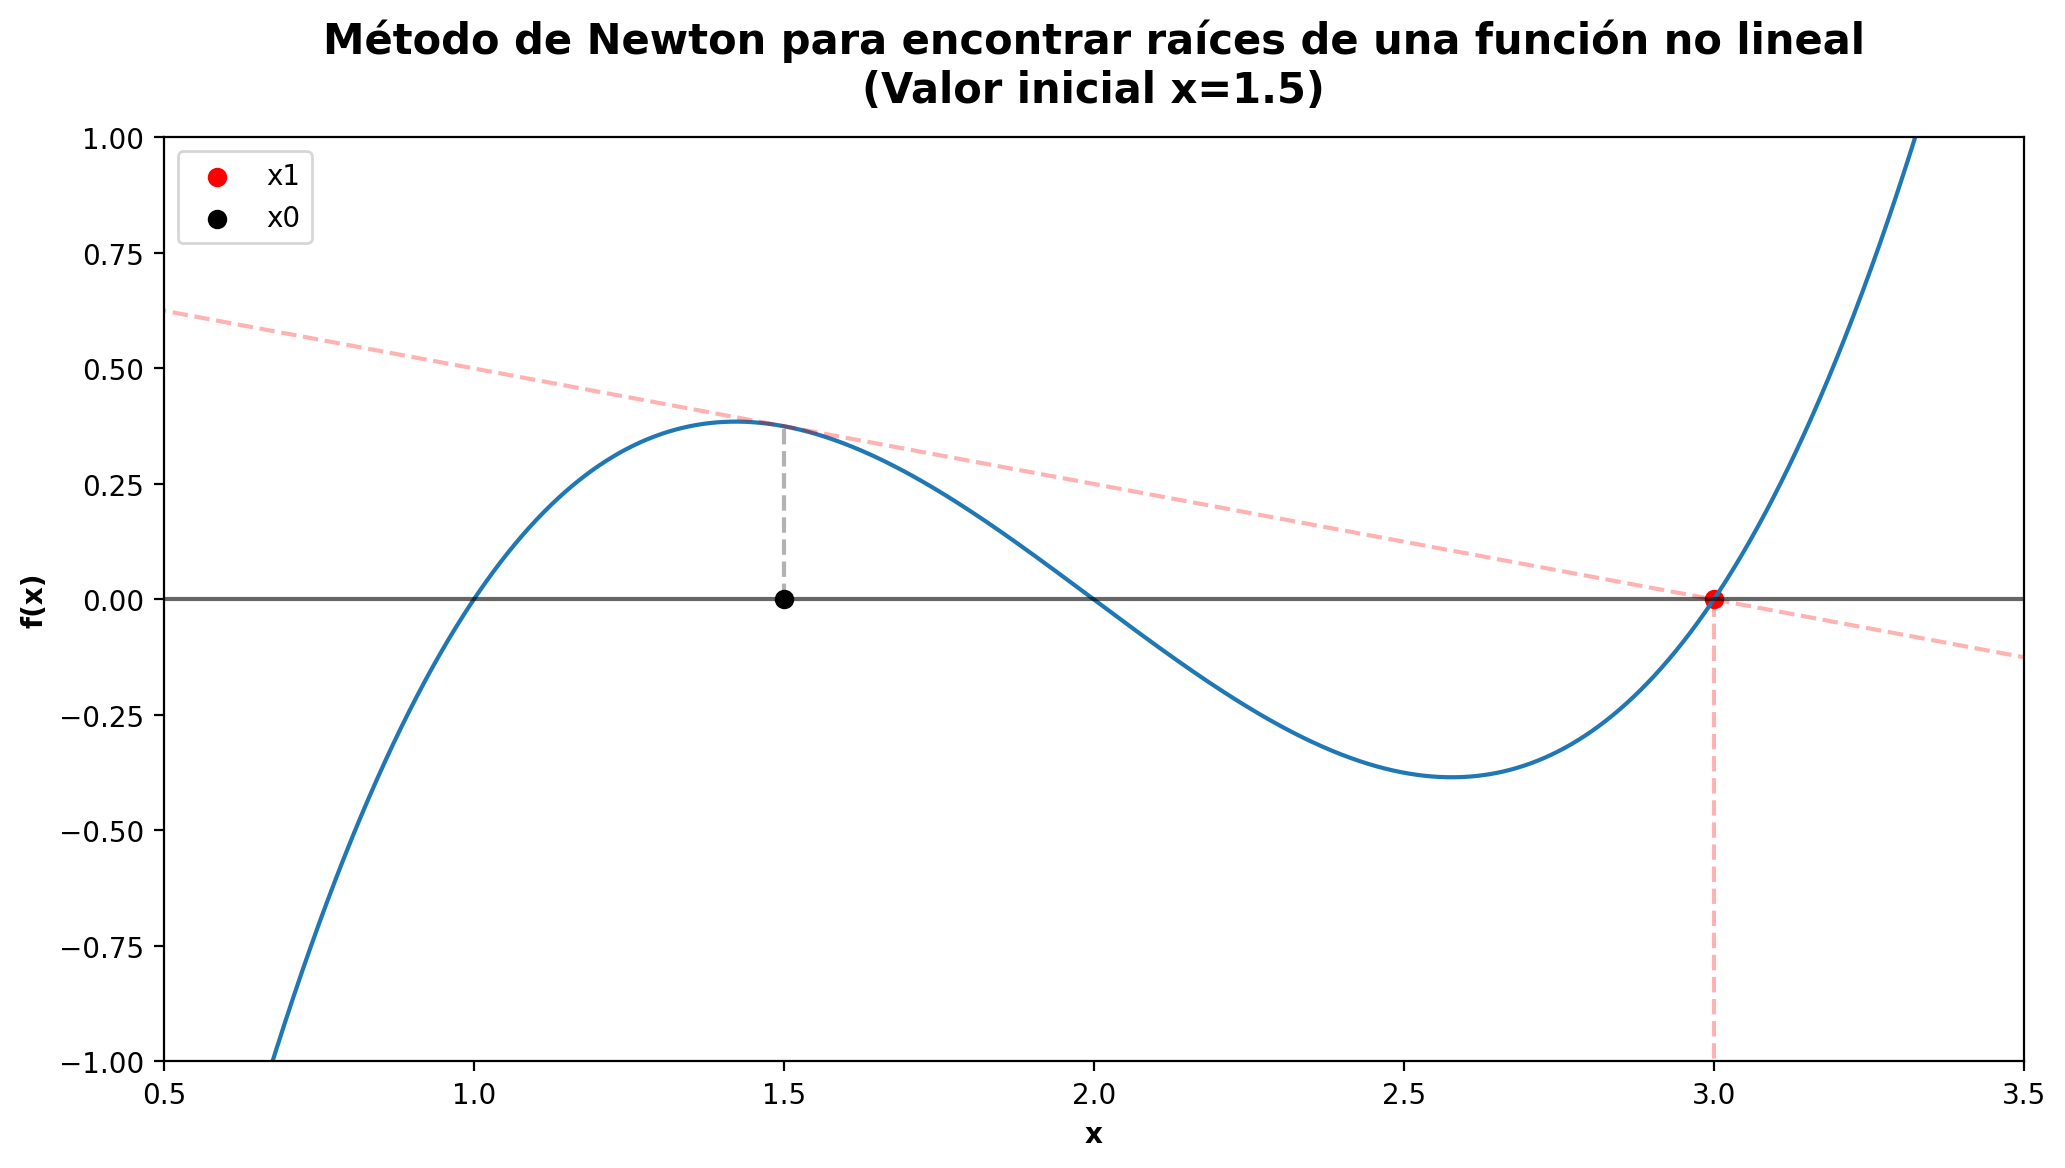

In [6]:
x_grafica1 = np.linspace(0, 4, 10000)
y_grafica1 = f_ejercicio2(x_grafica1)

plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(x=x_grafica1, y=y_grafica1)
sns.lineplot(x=x_lineal, y=y_lineal, color="red", linestyle="--", alpha=0.3)
plt.plot([0, 4], [0, 0], color="black", alpha=0.6)
plt.plot([3, 3], [-6, 0], linestyle="--", color="red", alpha=0.3)
plt.plot([1.5, 1.5], [0, f_ejercicio2(1.5)], linestyle="--", color="black", alpha=0.3)
plt.scatter(x=x_raiz, y=0, color="red", label="x1")
plt.scatter(x=x0, y=0, color="black", label="x0")
plt.title("Método de Newton para encontrar raíces de una función no lineal\n(Valor inicial x=1.5)",
          fontsize=15,
          fontweight="bold",
          y=1.02)
plt.ylabel("f(x)", fontsize=10, fontweight="bold")
plt.xlabel("x", fontsize=10, fontweight="bold")
plt.xlim(0.5, 3.5)
plt.ylim(-1, 1)
plt.legend()
plt.show()

En la gráfica se muestra mediante una línea roja punteada cómo el método de newton encuentra la raíz en la primera iteración, esto debido a que la pendiente de la función en el punto $ x_{0} $ proyecta la recta hacia un valor $ x_{1} $ que coincide con un valor de $x$ muy cercano a la raiz de la función $ f(x) $. Es decir, cuando se hace la primera aproximación mediante el modelo lineal obtenido por la serie de Taylor, se obtiene una función lineal $ F_{0}(x) $ cuya recta tiene la misma pendiente de la función $ f(x) $ en el punto $ x= x_{0} $ y esta recta corta al eje de las $x$ en $ F_{0}(x_{1}) $, en este caso $ f(x_{1}) $ es también un punto muy cercano a una de las reíces de la función $ f(x) $.

Es interesate observar que cuando el valor inicial establece como $x_{0} = 1.4 \quad y \quad x_{0} = 1.6$ se obtienen las otras dos raíces de la función $ f(x) $ que son 1 y 2 respectivamente. 

En la siguiente tabla se muestran los valores iniciales y los valores de las raíces obtenidas mediante cada uno de estos valores iniciales.

In [7]:
raices = []
iteraciones = []
valores_iniciales = [1.4, 1.5, 1.6]

for valor_inicial in valores_iniciales:
    iteracion, x_raiz = newton(f_ejercicio2, 10**(-6), valor_inicial, derivada_f_ejercicio2)
    raices.append(str(x_raiz))
    iteraciones.append(iteracion)


resultados_ejercicio_2 = pd.DataFrame({
    "Valor_inicial": valores_iniciales,
    "Raices_aproximadas": raices,
    "Iteraciones": iteraciones
})

resultados_ejercicio_2

,Valor_inicial,Raices_aproximadas,Iteraciones
0,1.4,0.9999999790521444,9
1,1.5,3.0,1
2,1.6,1.9999999999981601,4


Como se puede observar, A pesar de que el valor inicial 1.5 tiene a las raíces $ x=1 $ y $ x=2 $ más cerca que la raíz $ x=3 $, a la que encuentra es a esta última, esto debido a la pendiente de la función en este punto. 

Otra cosa a destacar es el hecho de que el método aproxima la raíz más lejana en una sola iteración, mientras que las raíces más cercanas del resto de los puntos iniciales, necesitan 4 y 9 iteraciones para ser aproximados

# Ejercicio 3

In [8]:
def f_ejercicio3(x):
    y = (x**3) - (2*(x**2)) - (x) + 2
    return y


def derivada_f_ejercicio3(x):
    y = 3*(x**2) - (4*x) - 1

    return y

### a)

In [9]:
e = 10**(-6)
x0 = 0

iteraciones_2, x_raiz_2 = newton(f_ejercicio3, e, x0, derivada_f_ejercicio3)
print(f"El valor de x que hace que f(x) = 0 es: {x_raiz_2}")
print(f"Se necesitan {iteraciones_2} iteraciones para encontrar x_raiz")

El valor de x que hace que f(x) = 0 es: 2.0
Se necesitan 1 iteraciones para encontrar x_raiz


### b)

In [10]:
x_lineal2 = np.linspace(-3, 3)
y_lineal2 = f_lineal(x_lineal2, f_ejercicio3, 0, derivada_f_ejercicio3)

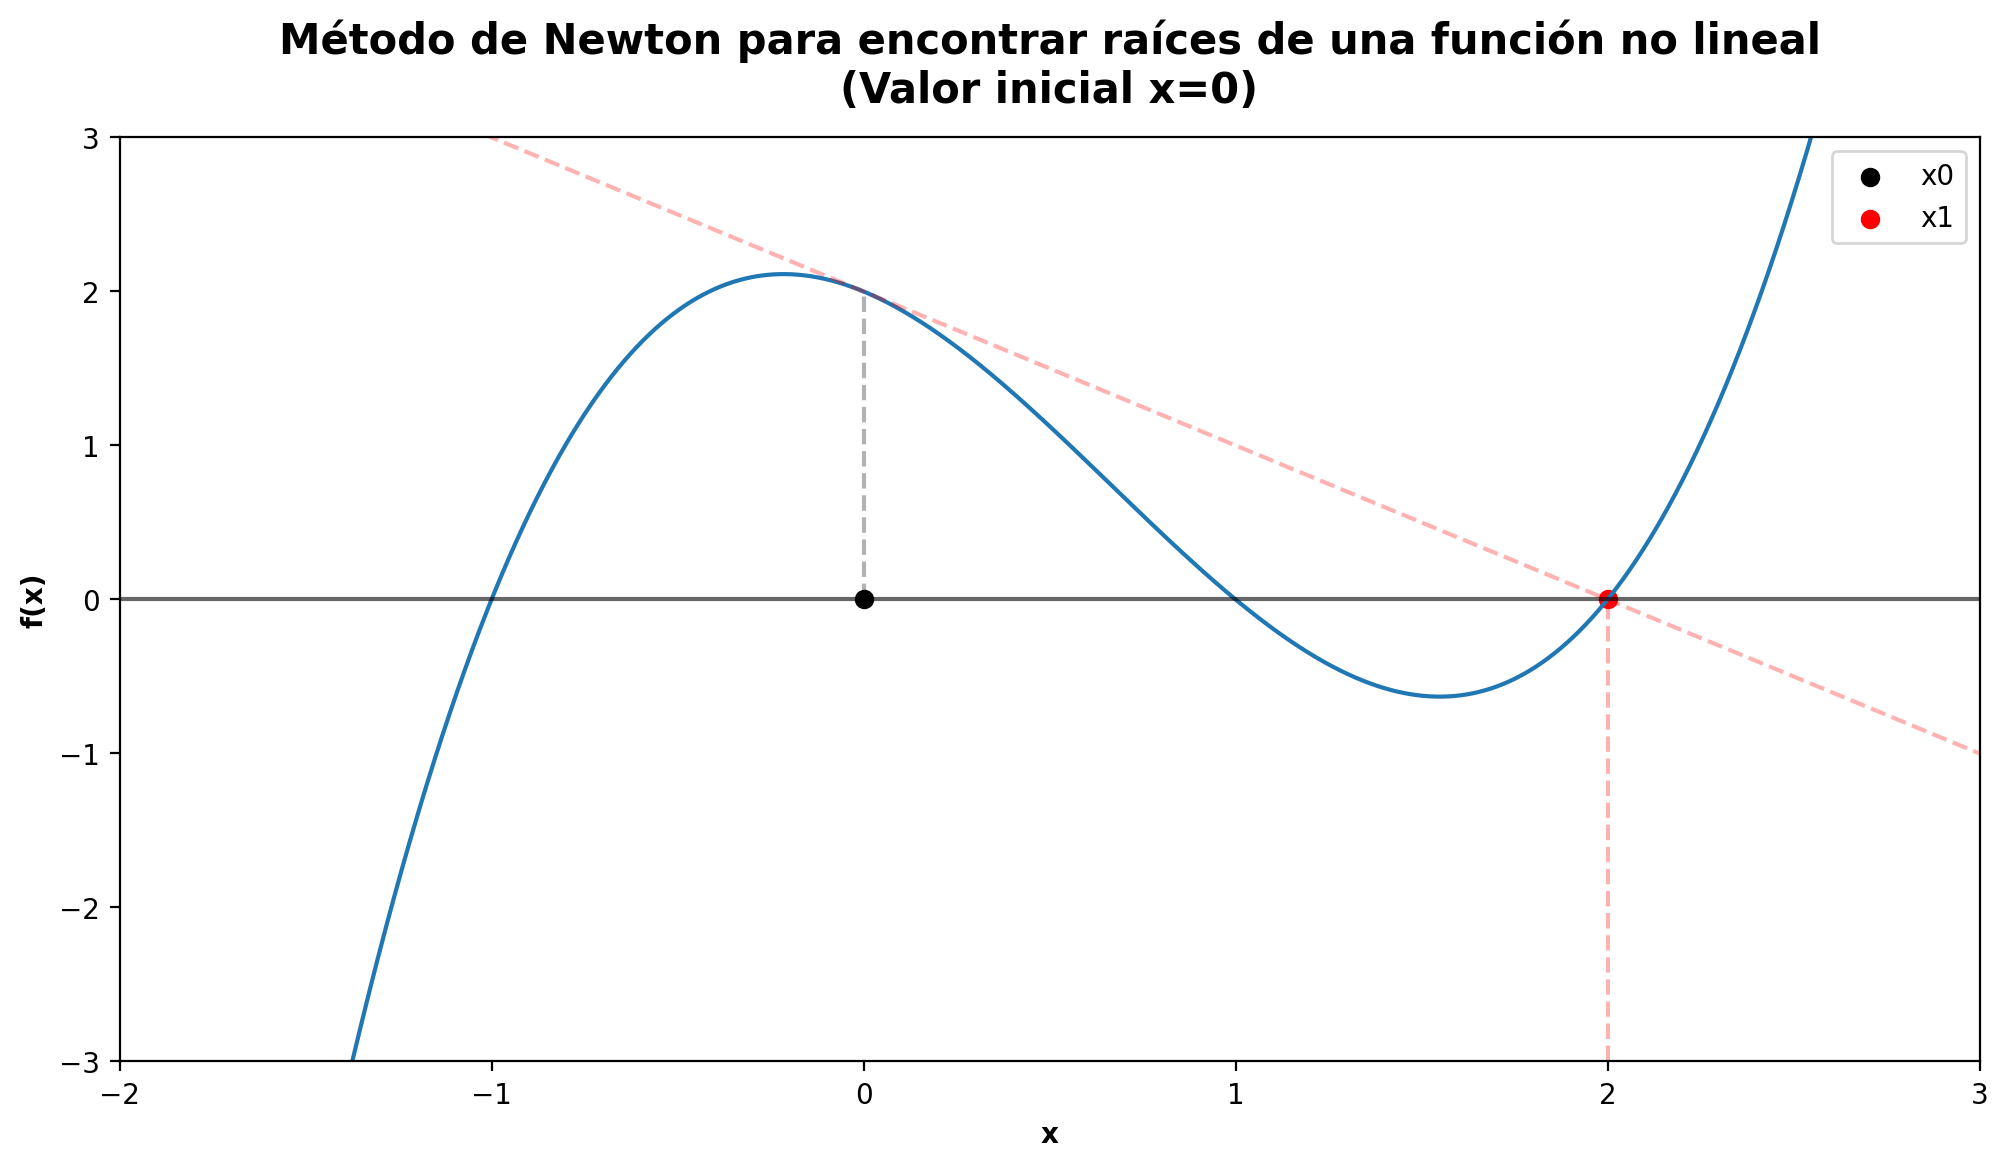

In [11]:
x_grafica2 = np.linspace(-5, 5, 10000)
y_grafica2 = f_ejercicio3(x_grafica2)

plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(x=x_grafica2, y=y_grafica2)
sns.lineplot(x=x_lineal2, y=y_lineal2, color="red", linestyle="--", alpha=0.3)
plt.plot([0, 0], [0, f_ejercicio3(0)], color="black", linestyle="--", alpha=0.3)
plt.scatter(x=x0, y=0, color="black", label="x0")
plt.scatter(x=x_raiz_2, y=0, color="red", label="x1")
plt.plot([x_raiz_2, x_raiz_2], [-3, 0], color="red", linestyle="--", alpha=0.3)
plt.plot([-5, 5], [0, 0], color="black", alpha=0.6)
plt.xlim(-2, 3)
plt.ylim(-3, 3)
plt.title("Método de Newton para encontrar raíces de una función no lineal\n(Valor inicial x=0)",
          fontsize=15,
          fontweight="bold",
          y=1.02)
plt.ylabel("f(x)", fontsize=10, fontweight="bold")
plt.xlabel("x", fontsize=10, fontweight="bold")
plt.legend()
plt.show()

En la gráfica se puede observar que el método converge hacia la raíz ubicada en $ x=2 $.

### c)
Se puede observar que el valor $ x_{0} = 0 $, y hay dos raíces igual de cercanas a este punto: $x = -1$ y $x=1$. Sin embargo, la raíz que encuentra el método es la raíz $ x=2 $ que es la más lejana del punto de inicio. Esto se debe a que, la pendiente de la recta para aproximar el resultado es igual a la pendiente de la función en ese mismo punto, y esta (la pendiente) es negativa, por lo cual no convergerá al valor $ x = -1 $ y su inclinación no es tan pronunciada, por lo que pasa de largo al valor $ x = 1 $, en este caso, el valor $ x = 2 $ Se encuentra justo en el punto donde la recta corta el eje $x$

Si se eligen puntos en los que la pendiente se acerca a la raiz más cercana se pueden obtener cada una de las raices de la función. En la siguiente tabla se muestran ejemplos de valores iniciales con los que se pueden aproximar los valores de las tres raíces así como el número de iteraciones que toma a partir de cada valor inicial

In [12]:
raices = []
iteraciones = []
valores_iniciales = [-0.4, 0.5, 0]

for valor_inicial in valores_iniciales:
    iteracion, x_raiz = newton(f_ejercicio3, 10**(-6), valor_inicial, derivada_f_ejercicio3)
    raices.append(str(x_raiz))
    iteraciones.append(iteracion)


resultados_ejercicio_3 = pd.DataFrame({
    "Valor_inicial": valores_iniciales,
    "Raices_aproximadas": raices,
    "Iteraciones": iteraciones
})

resultados_ejercicio_3

,Valor_inicial,Raices_aproximadas,Iteraciones
0,-0.4,-1.0000000148334849,6
1,0.5,1.0,1
2,0.0,2.0,1


### d)

# Método de bisección

Se aplicará el método de bisección para aproximar la raíz de $ f(x) $

In [13]:
def biseccion(f, e, a, b):
    if f(a) * f(b) > 0:
        print("Elige valores de a y b tal que f(a) * f(b) < 0")
    else:
        c = (1/2) * (a + b)
        counter = 0
        while np.absolute(f(c)) > e:
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (1/2) * (a + b)
            counter += 1

    return counter, c

In [14]:
a = 0
b = 1.9
e = 10**(-6)
try:
    iteraciones_3, x_raiz_3 = biseccion(f_ejercicio3, e, a, b)
    print(f"El valor de x que hace que f(x) = 0 es: {x_raiz_3}")
    print(f"Se necesitan {iteraciones_3} iteraciones para encontrar x_raiz")
except Exception:
    None

El valor de x que hace que f(x) = 0 es: 0.9999998092651368
Se necesitan 18 iteraciones para encontrar x_raiz


Si se toma como valor de inicio a $ x_{0} = 0 $, con el método de besección, dado que en este punto $ f(x) > 0 $ es nnecesario tomar un segundo valor que cumpla con $ f(x) < 0 $, por lo que se debe elegir un valor de $ 1 < x < 2 $. Dado que el valor de la única raíz que se encuentra dentro de este intervalo es $ x=1 $ es te es el valor que el método regresa.

Si se eligen intervalos adecuados entre cada raiz, se pueden obtener las aproximaciones de los valores de tales raíces.

La siguiente tabla muestra los valores inciales a y b que se pueden elegir en cada caso para aproximar los valores de las reíces de $ f(x) $

In [15]:
raices = []
iteraciones = []
valor_a = []
valor_b = []

for i in range(3):
    a = [0, -1.5, 1.5]
    b = [1.9, 0, 3]
    e = 10**(-6)
    iteraciones_3, x_raiz_3 = biseccion(f_ejercicio3, e, a[i], b[i])
    raices.append(x_raiz_3)
    iteraciones.append(iteraciones_3)
    valor_a.append(a[i])
    valor_b.append(b[i])


resultados_beseccion = pd.DataFrame({
    "Valor_inicial_a": valor_a,
    "Valor_inicial_b": valor_b,
    "Raices_aproximadas": raices,
    "Iteraciones": iteraciones
})

resultados_beseccion
    

,Valor_inicial_a,Valor_inicial_b,Raices_aproximadas,Iteraciones
0,0.0,1.9,1.0,18
1,-1.5,0.0,-1.0,21
2,1.5,3.0,2.0,20


# Método de la Secante

In [16]:
def secante(f, e, x0, x1):
    counter = 0
    while np.absolute(f(x0)) > e:
        x2 = x1 - (f(x1)*(x1-x0)/(f(x1) - f(x0)))
        x0 = x1
        x1 = x2
        counter += 1

    return counter, x0

In [17]:
iteraciones, x_raiz_secante = secante(f_ejercicio3, e, 0, 1.9)
print(f"Raíz: {x_raiz_secante}")
print(f"Iteraciones: {iteraciones}")

Raíz: 1.9999999994014173
Iteraciones: 8


El método de la secante es un punto intermedio entre el método de Newton y el de la bisección, en el sentido de que es más lento que el primero pero más rápido que el segundo, pero tiene la ventaja de que no es necesario calcular ninguna derivada, sin embargo, es necesario elegir dos puntos $x_{0}$ y $ x_{1} $ suficientemente cercanos a la raíz de $ f(x) $ para que el método converja adecuadamente.

En la siguiente tabla se muestran las aproximaciones a las raíces de $ f(x) $ así como los valores iniciales $x_{0}$ y $ x_{1} $ y el número de iteraciones que se necesitaron para alcanzar la aproximación a cada raíz

In [18]:
raices = []
iteraciones = []
valor_x0 = []
valor_x1 = []

for i in range(3):
    x0 = [0, -1.5, 1.5]
    x1 = [1.5, 0, 3]
    e = 10**(-6)
    iteraciones_secante, x_raiz_secante = secante(f_ejercicio3, e, x0[i], x1[i])
    raices.append(x_raiz_secante)
    iteraciones.append(iteraciones_secante)
    valor_x0.append(x0[i])
    valor_x1.append(x1[i])


resultados_secante = pd.DataFrame({
    "Valor_inicial_x0": valor_x0,
    "Valor_inicial_x1": valor_x1,
    "Raices_aproximadas": raices,
    "Iteraciones": iteraciones
})

resultados_secante
    

,Valor_inicial_x0,Valor_inicial_x1,Raices_aproximadas,Iteraciones
0,0.0,1.5,1.0,7
1,-1.5,0.0,-1.0,12
2,1.5,3.0,2.0,11


# Conclusiones
Los tres métodos desarrollados en este trabajo tienen la propiedad de realizar aproximaciones numéricas de las raíces de ecuadiones no lineales. 

Sin embargo, la forma en la que cada método aborda esta aproximación es distinta lo que implica que cada método tiene sus propias particularidades y el rendimiento de estos es distinto.

En este caso, pudimos bservar que el método de Newton es el más rápido, requiriendo de una a 6 iteraciones para encontrar las distintas raíces de la función cúbica.

El segundo más rápido es el método de la secante, el cual requiere de 7 a 12 iteraciones, y por último el método de la bisección, que requiere de 18 a 21 iteraciones.

Sin embargo, estos métodos no pueden ser evaluados únicamente por su velocidad ya que otros factores como la capacidad de convergencia y la facilidad de la implementación pueden ser importantes dependiendo del problema que se quiera solucionar. Un ejemplo de esto puede ser que, el método de Newton requiere del cálculo de una derivada para su implementación, lo cual podría dificultar el proceso si la derivada es muy comleja de calcular, mientras que los mpétodos como la bisección y la secante, no requieren de calcular derivadas.


# Referencias
Tveito, et.al. Elements of Scientific Computing (2010)

OpenAI. (2024). *ChatGPT*. Recuperado de [https://chat.openai.com](https://chat.openai.com)
